In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from joblib import dump,load

In [2]:
df = [pd.read_csv('user_' + user + '.csv') for user in ['a', 'b', 'c', 'd']]

In [3]:
df

[      Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
 0       1.0    3569.164550  2063.892754       1.673726     4.444736   
 1       1.0    3568.423670  2063.099248       1.897790     3.728823   
 2       1.0    3568.157929  2062.445859       2.798014     2.574504   
 3       1.0    3567.710021  2062.112673       2.181775     3.610507   
 4       1.0    3565.546124  2063.128867       1.685161     3.384311   
 ...     ...            ...          ...            ...          ...   
 2875    0.0    3572.820630  2064.823341       0.676923     1.620879   
 2876    0.0    3573.915291  2065.845542       0.860279     1.504333   
 2877    0.0    3574.326202  2066.031013       1.416731     2.581577   
 2878    0.0    3573.735788  2065.945333       1.119943     2.769816   
 2879    0.0    3573.982930  2065.960401       1.011062     2.696217   
 
       AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
 0          0.526209     3.002088      1.425022    3

In [4]:
for i in range(len(df)):
    df[i]['User'] = pd.Series(i, index=df[i].index)

In [5]:
df[0]

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,...,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719,0
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041,0
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,...,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924,0
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,...,63.915386,3725.822160,2177.089059,19.737616,29.484396,15.793034,25.713513,39.250246,65.031031,0
4,1.0,3565.546124,2063.128867,1.685161,3.384311,0.677526,1.795798,0.927924,1.909810,3562.655091,...,64.534645,3723.053978,2167.798335,8.429414,26.374975,14.920736,35.675266,33.901687,66.956313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0.0,3572.820630,2064.823341,0.676923,1.620879,0.965369,2.392263,2.582266,3.185588,3565.166724,...,13.320391,3607.467804,2089.263161,1.605773,4.247634,1.649762,2.938868,31.019482,16.648758,0
2876,0.0,3573.915291,2065.845542,0.860279,1.504333,0.539180,1.331165,2.533695,2.870270,3565.734750,...,14.809811,3613.165565,2089.298802,0.643899,6.903858,1.287563,3.942647,31.546882,17.429113,0
2877,0.0,3574.326202,2066.031013,1.416731,2.581577,0.715012,1.307975,2.261013,2.873613,3567.582880,...,16.084048,3615.755534,2094.482958,1.851314,5.683580,2.411642,6.355117,32.238063,19.023897,0
2878,0.0,3573.735788,2065.945333,1.119943,2.769816,0.455408,1.541430,1.782814,3.067384,3567.857997,...,21.248860,3620.821019,2097.450420,5.035767,12.027902,6.441267,14.663681,24.109509,26.468254,0


In [6]:
df = pd.concat(df, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [7]:
df

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User
0,0.0,3572.252440,2065.056469,0.851824,2.047953,0.651871,2.522036,2.109733,3.347705,3564.779879,...,35.151586,3628.426885,2129.789645,5.353671,17.885132,7.672209,29.960618,43.216980,43.932669,0
1,1.0,3574.116024,2065.528155,1.932513,3.321636,1.138012,2.349805,2.256212,3.945981,3563.399422,...,40.800889,3680.341349,2144.200503,10.819521,36.995982,12.812193,24.146774,23.747501,49.072017,0
2,0.0,3554.487593,2056.215665,0.935015,3.793783,0.736168,2.680542,3.381325,4.678876,3568.839949,...,18.176841,3538.347368,2081.315814,5.486555,13.204753,0.664075,6.633072,1.434277,4.132446,2
3,0.0,3570.668125,2063.974908,1.875394,3.028541,0.910000,3.018672,1.163312,2.883009,3565.403408,...,55.547547,3604.601528,2122.493834,15.611283,16.452483,22.462175,46.703612,32.213578,70.892466,0
4,0.0,3559.747108,2057.401763,1.053691,1.530594,1.593121,2.789907,2.668865,4.326693,3573.651774,...,7.208052,3513.244789,2030.461207,1.455450,3.030659,0.482971,3.200647,0.895170,2.099638,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,2.0,3570.748191,2063.201099,0.727594,1.404708,0.995674,2.569811,0.991322,1.987807,3562.594707,...,1.910036,3567.687654,2062.791757,1.748982,2.097780,1.242056,1.682180,1.277379,1.997654,3
11516,1.0,3566.600695,2062.436502,1.491797,3.013466,1.338308,2.769207,4.268401,3.877338,3576.187723,...,5.217772,3548.277991,2055.537892,1.787661,3.366967,0.810903,1.739812,2.202195,3.294145,2
11517,0.0,3574.186933,2064.477869,0.710708,1.534898,0.749206,2.038258,2.208018,2.157076,3566.398415,...,2.200203,3572.290285,2063.776063,1.268569,2.547969,0.887808,1.651011,1.533523,1.957866,1
11518,0.0,3574.343116,2065.996679,0.606401,2.835015,0.617079,1.209722,3.357912,3.098423,3566.521533,...,15.413625,3608.394990,2091.509508,1.479338,3.824176,3.281520,4.238889,33.441194,19.158094,0


In [8]:
first_column = df['Class']
df = df.drop('Class', axis=1)

In [9]:
df['Class'] = first_column

In [10]:
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,3572.252440,2065.056469,0.851824,2.047953,0.651871,2.522036,2.109733,3.347705,3564.779879,2061.195445,...,3628.426885,2129.789645,5.353671,17.885132,7.672209,29.960618,43.216980,43.932669,0,0.0
1,3574.116024,2065.528155,1.932513,3.321636,1.138012,2.349805,2.256212,3.945981,3563.399422,2062.290606,...,3680.341349,2144.200503,10.819521,36.995982,12.812193,24.146774,23.747501,49.072017,0,1.0
2,3554.487593,2056.215665,0.935015,3.793783,0.736168,2.680542,3.381325,4.678876,3568.839949,2061.818772,...,3538.347368,2081.315814,5.486555,13.204753,0.664075,6.633072,1.434277,4.132446,2,0.0
3,3570.668125,2063.974908,1.875394,3.028541,0.910000,3.018672,1.163312,2.883009,3565.403408,2060.271106,...,3604.601528,2122.493834,15.611283,16.452483,22.462175,46.703612,32.213578,70.892466,0,0.0
4,3559.747108,2057.401763,1.053691,1.530594,1.593121,2.789907,2.668865,4.326693,3573.651774,2065.274034,...,3513.244789,2030.461207,1.455450,3.030659,0.482971,3.200647,0.895170,2.099638,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,3570.748191,2063.201099,0.727594,1.404708,0.995674,2.569811,0.991322,1.987807,3562.594707,2059.455684,...,3567.687654,2062.791757,1.748982,2.097780,1.242056,1.682180,1.277379,1.997654,3,2.0
11516,3566.600695,2062.436502,1.491797,3.013466,1.338308,2.769207,4.268401,3.877338,3576.187723,2065.982437,...,3548.277991,2055.537892,1.787661,3.366967,0.810903,1.739812,2.202195,3.294145,2,1.0
11517,3574.186933,2064.477869,0.710708,1.534898,0.749206,2.038258,2.208018,2.157076,3566.398415,2061.123322,...,3572.290285,2063.776063,1.268569,2.547969,0.887808,1.651011,1.533523,1.957866,1,0.0
11518,3574.343116,2065.996679,0.606401,2.835015,0.617079,1.209722,3.357912,3.098423,3566.521533,2060.758758,...,3608.394990,2091.509508,1.479338,3.824176,3.281520,4.238889,33.441194,19.158094,0,0.0


## Data Preprocesing
In this part, we'll:
1. Make a pipeline to for imputer (strategy of median)
2. Apply standard scaler on all features without `Class`.
3. Fetch outliers from dataset by Z-score technique with threshold value of 3 and remove them from dataset
4. Since our dataset contains two multiclass features, i.e., `User` & `Class`, we'll use stratified train test split technique to get equal ratio of all categories of every feature in train and test set.

In [11]:
imputer_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median'))
#         ('std_scaler', StandardScaler())
    ])

In [12]:
df1 = imputer_pipeline.fit_transform(df)

In [13]:
df = pd.DataFrame(df1,columns=df.columns)
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,3572.252440,2065.056469,0.851824,2.047953,0.651871,2.522036,2.109733,3.347705,3564.779879,2061.195445,...,3628.426885,2129.789645,5.353671,17.885132,7.672209,29.960618,43.216980,43.932669,0.0,0.0
1,3574.116024,2065.528155,1.932513,3.321636,1.138012,2.349805,2.256212,3.945981,3563.399422,2062.290606,...,3680.341349,2144.200503,10.819521,36.995982,12.812193,24.146774,23.747501,49.072017,0.0,1.0
2,3554.487593,2056.215665,0.935015,3.793783,0.736168,2.680542,3.381325,4.678876,3568.839949,2061.818772,...,3538.347368,2081.315814,5.486555,13.204753,0.664075,6.633072,1.434277,4.132446,2.0,0.0
3,3570.668125,2063.974908,1.875394,3.028541,0.910000,3.018672,1.163312,2.883009,3565.403408,2060.271106,...,3604.601528,2122.493834,15.611283,16.452483,22.462175,46.703612,32.213578,70.892466,0.0,0.0
4,3559.747108,2057.401763,1.053691,1.530594,1.593121,2.789907,2.668865,4.326693,3573.651774,2065.274034,...,3513.244789,2030.461207,1.455450,3.030659,0.482971,3.200647,0.895170,2.099638,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,3570.748191,2063.201099,0.727594,1.404708,0.995674,2.569811,0.991322,1.987807,3562.594707,2059.455684,...,3567.687654,2062.791757,1.748982,2.097780,1.242056,1.682180,1.277379,1.997654,3.0,2.0
11516,3566.600695,2062.436502,1.491797,3.013466,1.338308,2.769207,4.268401,3.877338,3576.187723,2065.982437,...,3548.277991,2055.537892,1.787661,3.366967,0.810903,1.739812,2.202195,3.294145,2.0,1.0
11517,3574.186933,2064.477869,0.710708,1.534898,0.749206,2.038258,2.208018,2.157076,3566.398415,2061.123322,...,3572.290285,2063.776063,1.268569,2.547969,0.887808,1.651011,1.533523,1.957866,1.0,0.0
11518,3574.343116,2065.996679,0.606401,2.835015,0.617079,1.209722,3.357912,3.098423,3566.521533,2060.758758,...,3608.394990,2091.509508,1.479338,3.824176,3.281520,4.238889,33.441194,19.158094,0.0,0.0


In [14]:
df1 = df.drop(['User','Class'],axis=1)

In [15]:
df1

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,3572.252440,2065.056469,0.851824,2.047953,0.651871,2.522036,2.109733,3.347705,3564.779879,2061.195445,...,35.417275,35.151586,3628.426885,2129.789645,5.353671,17.885132,7.672209,29.960618,43.216980,43.932669
1,3574.116024,2065.528155,1.932513,3.321636,1.138012,2.349805,2.256212,3.945981,3563.399422,2062.290606,...,19.403818,40.800889,3680.341349,2144.200503,10.819521,36.995982,12.812193,24.146774,23.747501,49.072017
2,3554.487593,2056.215665,0.935015,3.793783,0.736168,2.680542,3.381325,4.678876,3568.839949,2061.818772,...,5.672901,18.176841,3538.347368,2081.315814,5.486555,13.204753,0.664075,6.633072,1.434277,4.132446
3,3570.668125,2063.974908,1.875394,3.028541,0.910000,3.018672,1.163312,2.883009,3565.403408,2060.271106,...,25.544035,55.547547,3604.601528,2122.493834,15.611283,16.452483,22.462175,46.703612,32.213578,70.892466
4,3559.747108,2057.401763,1.053691,1.530594,1.593121,2.789907,2.668865,4.326693,3573.651774,2065.274034,...,5.272191,7.208052,3513.244789,2030.461207,1.455450,3.030659,0.482971,3.200647,0.895170,2.099638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,3570.748191,2063.201099,0.727594,1.404708,0.995674,2.569811,0.991322,1.987807,3562.594707,2059.455684,...,1.020018,1.910036,3567.687654,2062.791757,1.748982,2.097780,1.242056,1.682180,1.277379,1.997654
11516,3566.600695,2062.436502,1.491797,3.013466,1.338308,2.769207,4.268401,3.877338,3576.187723,2065.982437,...,4.586349,5.217772,3548.277991,2055.537892,1.787661,3.366967,0.810903,1.739812,2.202195,3.294145
11517,3574.186933,2064.477869,0.710708,1.534898,0.749206,2.038258,2.208018,2.157076,3566.398415,2061.123322,...,2.189225,2.200203,3572.290285,2063.776063,1.268569,2.547969,0.887808,1.651011,1.533523,1.957866
11518,3574.343116,2065.996679,0.606401,2.835015,0.617079,1.209722,3.357912,3.098423,3566.521533,2060.758758,...,27.025346,15.413625,3608.394990,2091.509508,1.479338,3.824176,3.281520,4.238889,33.441194,19.158094


In [16]:
scaler_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy = 'median'))
        ('std_scaler', StandardScaler())
    ])

In [17]:
df2 = scaler_pipeline.fit_transform(df1)

In [18]:
df1 = pd.DataFrame(df2,columns=df1.columns)

In [19]:
df1

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,0.079746,0.049762,-0.308773,-0.333524,-0.557591,0.383729,-0.098155,0.316722,-0.839721,-0.469198,...,1.829972,1.633199,1.580647,1.960999,0.768326,1.207728,1.292005,2.536701,1.939348,1.860453
1,0.303416,0.142044,1.445118,0.692899,0.492949,0.177310,0.065404,1.030868,-1.149139,-0.072245,...,0.694366,2.023928,3.232503,2.497107,2.258588,3.218813,2.583794,1.910836,0.794415,2.156546
2,-2.052417,-1.679879,-0.173761,1.073387,-0.375428,0.573697,1.321708,1.905706,0.070312,-0.243266,...,-0.279371,0.459158,-1.285577,0.157692,0.804557,0.715200,-0.469290,0.025473,-0.517749,-0.432559
3,-0.110406,-0.161838,1.352418,0.456702,0.000221,0.978945,-1.154931,-0.237973,-0.699962,-0.804235,...,1.129804,3.043866,0.822552,1.689583,3.565060,1.056967,5.009042,4.339097,1.292276,3.413689
4,-1.421162,-1.447827,0.018843,-0.750448,1.476431,0.704770,0.526174,1.485315,1.148844,1.009132,...,-0.307788,-0.299488,-2.084312,-1.734184,-0.294522,-0.355447,-0.514805,-0.344030,-0.549452,-0.549675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,-0.100796,-0.313228,-0.510391,-0.851895,0.185360,0.440987,-1.346975,-1.306553,-1.329510,-1.099793,...,-0.609334,-0.665920,-0.352004,-0.531434,-0.214491,-0.453616,-0.324031,-0.507495,-0.526976,-0.555550
11516,-0.598585,-0.462816,0.729862,0.444553,0.925786,0.679962,2.312220,0.948932,1.717257,1.265900,...,-0.356425,-0.437144,-0.969596,-0.801290,-0.203945,-0.320056,-0.432389,-0.501290,-0.472591,-0.480856
11517,0.311926,-0.063437,-0.537797,-0.746979,-0.347253,-0.196077,0.011591,-1.104502,-0.476939,-0.495339,...,-0.526418,-0.645851,-0.205554,-0.494816,-0.345475,-0.406241,-0.413061,-0.510850,-0.511913,-0.557843
11518,0.330672,0.233708,-0.707081,0.300745,-0.632777,-1.189074,1.295566,0.019161,-0.449343,-0.627480,...,1.234852,0.268042,0.943255,0.536914,-0.288009,-0.271943,0.188530,-0.232263,1.364468,0.433115


In [20]:
df = pd.concat([df1,df[['User','Class']]],axis=1)

In [21]:
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,0.079746,0.049762,-0.308773,-0.333524,-0.557591,0.383729,-0.098155,0.316722,-0.839721,-0.469198,...,1.580647,1.960999,0.768326,1.207728,1.292005,2.536701,1.939348,1.860453,0.0,0.0
1,0.303416,0.142044,1.445118,0.692899,0.492949,0.177310,0.065404,1.030868,-1.149139,-0.072245,...,3.232503,2.497107,2.258588,3.218813,2.583794,1.910836,0.794415,2.156546,0.0,1.0
2,-2.052417,-1.679879,-0.173761,1.073387,-0.375428,0.573697,1.321708,1.905706,0.070312,-0.243266,...,-1.285577,0.157692,0.804557,0.715200,-0.469290,0.025473,-0.517749,-0.432559,2.0,0.0
3,-0.110406,-0.161838,1.352418,0.456702,0.000221,0.978945,-1.154931,-0.237973,-0.699962,-0.804235,...,0.822552,1.689583,3.565060,1.056967,5.009042,4.339097,1.292276,3.413689,0.0,0.0
4,-1.421162,-1.447827,0.018843,-0.750448,1.476431,0.704770,0.526174,1.485315,1.148844,1.009132,...,-2.084312,-1.734184,-0.294522,-0.355447,-0.514805,-0.344030,-0.549452,-0.549675,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,-0.100796,-0.313228,-0.510391,-0.851895,0.185360,0.440987,-1.346975,-1.306553,-1.329510,-1.099793,...,-0.352004,-0.531434,-0.214491,-0.453616,-0.324031,-0.507495,-0.526976,-0.555550,3.0,2.0
11516,-0.598585,-0.462816,0.729862,0.444553,0.925786,0.679962,2.312220,0.948932,1.717257,1.265900,...,-0.969596,-0.801290,-0.203945,-0.320056,-0.432389,-0.501290,-0.472591,-0.480856,2.0,1.0
11517,0.311926,-0.063437,-0.537797,-0.746979,-0.347253,-0.196077,0.011591,-1.104502,-0.476939,-0.495339,...,-0.205554,-0.494816,-0.345475,-0.406241,-0.413061,-0.510850,-0.511913,-0.557843,1.0,0.0
11518,0.330672,0.233708,-0.707081,0.300745,-0.632777,-1.189074,1.295566,0.019161,-0.449343,-0.627480,...,0.943255,0.536914,-0.288009,-0.271943,0.188530,-0.232263,1.364468,0.433115,0.0,0.0


## Handling Outliers
We'll try to fetch the outliers using Z-score technique.

## 1. Fetching Outliers
Our data features has already mean of 0 and standard deviation of 1 because of StandardScaler(). So, all those values in every column are outliers whose absolute value is greater than pur set threshold 3.

In [22]:
Outliers = []
threshold = 3
m = len(df.columns)-2
# Iterate through each column of the DataFrame df
for i in range(m):
    in_outliers = []
    data = df.iloc[:, i]
#     mean = np.mean(data)
#     std = np.std(data)
    data_array = df.iloc[:, i].values
    # Iterate through each data point (j) in the column and its index (idx)
    for idx, j in enumerate(data_array):
        if np.abs(j) > threshold:
            in_outliers.append((idx, j))  # Append tuple of (index, value)
    Outliers.append(in_outliers)  # Append list of tuples for the column

In [23]:
# Outliers

[[(238, 3.2069977782529335),
  (240, 3.4918063433382134),
  (285, -3.232945114550021),
  (392, 6.058564968170401),
  (471, 4.315951997851874),
  (536, 8.017649508547365),
  (760, 3.2430232122738767),
  (783, 5.759459459119074),
  (789, 4.075649540761656),
  (833, 15.448527099913717),
  (950, -5.868482677935893),
  (955, -7.854535239564007),
  (1133, 5.642779174338838),
  (1624, -19.786339868422402),
  (1899, -6.070069453352012),
  (1961, 3.0526311731656373),
  (2093, 3.253332111420776),
  (2181, 3.804616803554567),
  (2391, 3.6989047787322855),
  (2403, -3.4743230330280546),
  (2506, -4.790112841824145),
  (2515, 5.397395119892619),
  (2560, -4.487856418009504),
  (2612, -3.27618650786365),
  (2700, 4.479109884009397),
  (2915, 3.207841532362433),
  (2981, -6.566797288874838),
  (3047, -24.046336843441964),
  (3070, 6.269356350574651),
  (3348, 7.392140057938511),
  (3373, 12.750240387072722),
  (3633, -17.67535671224603),
  (3677, -19.158332652390797),
  (3862, 7.326415698991692),
  (

## 2. Removing Outliers

In [24]:
# Iterate through each row of the original dataset df
for i in range(len(Outliers)):
    outliers_indices = [t[0] for t in Outliers[i]]
    for j in outliers_indices:
        if j in df.index:
            df = df.drop(j)
        else:
            continue

In [25]:
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,0.079746,0.049762,-0.308773,-0.333524,-0.557591,0.383729,-0.098155,0.316722,-0.839721,-0.469198,...,1.580647,1.960999,0.768326,1.207728,1.292005,2.536701,1.939348,1.860453,0.0,0.0
6,0.230346,-0.021455,-0.165183,-0.050681,-0.191473,-0.687363,-0.139131,-0.384578,0.088228,-0.052296,...,-0.212181,-0.430579,-0.433851,-0.547113,-0.423403,-0.512449,-0.498405,-0.545251,1.0,0.0
8,0.167182,0.147060,0.078359,0.082707,-0.731994,-0.413256,0.278941,1.153163,1.287356,1.249558,...,0.512950,0.514752,-0.135331,-0.255297,-0.263423,-0.315530,-0.527788,-0.541495,2.0,0.0
9,0.125078,-0.160105,-0.114988,-0.384116,-0.730696,-0.685450,0.050497,-0.432647,-0.379277,-0.717760,...,-0.255606,-0.514959,-0.327757,-0.467773,-0.532417,-0.530954,-0.522693,-0.556364,1.0,1.0
11,-0.223403,-0.393961,-1.228466,-0.492373,-0.476580,1.724581,-0.903891,-0.827811,-1.304310,-1.322065,...,-0.355929,-0.541687,-0.419127,-0.441239,-0.355356,-0.447826,-0.510764,-0.556594,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11513,-0.309791,0.013614,0.120233,-0.122598,0.384877,0.979023,1.257951,2.441727,1.429794,1.784224,...,-0.385457,0.022359,-0.228371,-0.338839,-0.413936,-0.526488,-0.450116,-0.467692,2.0,1.0
11516,-0.598585,-0.462816,0.729862,0.444553,0.925786,0.679962,2.312220,0.948932,1.717257,1.265900,...,-0.969596,-0.801290,-0.203945,-0.320056,-0.432389,-0.501290,-0.472591,-0.480856,2.0,1.0
11517,0.311926,-0.063437,-0.537797,-0.746979,-0.347253,-0.196077,0.011591,-1.104502,-0.476939,-0.495339,...,-0.205554,-0.494816,-0.345475,-0.406241,-0.413061,-0.510850,-0.511913,-0.557843,1.0,0.0
11518,0.330672,0.233708,-0.707081,0.300745,-0.632777,-1.189074,1.295566,0.019161,-0.449343,-0.627480,...,0.943255,0.536914,-0.288009,-0.271943,0.188530,-0.232263,1.364468,0.433115,0.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8315 entries, 0 to 11519
Columns: 114 entries, AF3 delta std to Class
dtypes: float64(114)
memory usage: 7.5 MB


In [27]:
df.describe()

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
count,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,...,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000,8315.000000
mean,0.010570,-0.086691,-0.084502,-0.130753,-0.095571,-0.129230,-0.194113,-0.235120,-0.155647,-0.177402,...,-0.065415,-0.201261,-0.193811,-0.195387,-0.192521,-0.199277,-0.162224,-0.179834,1.575225,1.006735
std,0.449644,0.429196,0.722912,0.515383,0.861339,0.788384,0.860645,0.888991,0.905214,0.875457,...,0.612096,0.628478,0.565258,0.539523,0.557600,0.611262,0.739195,0.751638,1.122822,0.810802
min,-2.773070,-2.057408,-1.642267,-1.597610,-1.822523,-2.044505,-1.865567,-2.082687,-2.603325,-2.817334,...,-2.065711,-1.533951,-0.678423,-0.621842,-0.625305,-0.635742,-0.574737,-0.592838,0.000000,0.000000
25%,-0.267900,-0.348420,-0.612170,-0.488278,-0.732659,-0.686115,-0.939749,-0.911045,-0.887870,-0.804401,...,-0.342623,-0.543982,-0.488984,-0.470352,-0.478449,-0.504131,-0.533045,-0.548162,1.000000,0.000000
50%,0.032680,-0.072742,-0.161482,-0.169733,-0.203526,-0.193730,-0.243741,-0.441564,-0.256524,-0.306076,...,-0.252259,-0.489119,-0.393603,-0.414613,-0.396710,-0.446840,-0.516802,-0.534069,1.000000,1.000000
75%,0.294826,0.167873,0.335127,0.170719,0.427352,0.373221,0.411152,0.304857,0.344173,0.219026,...,-0.087901,-0.088607,-0.228919,-0.287766,-0.256115,-0.337025,-0.472987,-0.489821,3.000000,2.000000
max,2.960503,2.909909,2.993770,2.980795,2.992374,2.987991,2.980400,2.989870,2.550212,2.536103,...,2.999441,2.998951,2.923453,2.919901,2.950096,2.998233,2.873876,2.787599,3.000000,2.000000


In [28]:
df = df.drop_duplicates()

In [29]:
df.isnull().sum().sum()

0

In [30]:
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,0.079746,0.049762,-0.308773,-0.333524,-0.557591,0.383729,-0.098155,0.316722,-0.839721,-0.469198,...,1.580647,1.960999,0.768326,1.207728,1.292005,2.536701,1.939348,1.860453,0.0,0.0
6,0.230346,-0.021455,-0.165183,-0.050681,-0.191473,-0.687363,-0.139131,-0.384578,0.088228,-0.052296,...,-0.212181,-0.430579,-0.433851,-0.547113,-0.423403,-0.512449,-0.498405,-0.545251,1.0,0.0
8,0.167182,0.147060,0.078359,0.082707,-0.731994,-0.413256,0.278941,1.153163,1.287356,1.249558,...,0.512950,0.514752,-0.135331,-0.255297,-0.263423,-0.315530,-0.527788,-0.541495,2.0,0.0
9,0.125078,-0.160105,-0.114988,-0.384116,-0.730696,-0.685450,0.050497,-0.432647,-0.379277,-0.717760,...,-0.255606,-0.514959,-0.327757,-0.467773,-0.532417,-0.530954,-0.522693,-0.556364,1.0,1.0
11,-0.223403,-0.393961,-1.228466,-0.492373,-0.476580,1.724581,-0.903891,-0.827811,-1.304310,-1.322065,...,-0.355929,-0.541687,-0.419127,-0.441239,-0.355356,-0.447826,-0.510764,-0.556594,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11513,-0.309791,0.013614,0.120233,-0.122598,0.384877,0.979023,1.257951,2.441727,1.429794,1.784224,...,-0.385457,0.022359,-0.228371,-0.338839,-0.413936,-0.526488,-0.450116,-0.467692,2.0,1.0
11516,-0.598585,-0.462816,0.729862,0.444553,0.925786,0.679962,2.312220,0.948932,1.717257,1.265900,...,-0.969596,-0.801290,-0.203945,-0.320056,-0.432389,-0.501290,-0.472591,-0.480856,2.0,1.0
11517,0.311926,-0.063437,-0.537797,-0.746979,-0.347253,-0.196077,0.011591,-1.104502,-0.476939,-0.495339,...,-0.205554,-0.494816,-0.345475,-0.406241,-0.413061,-0.510850,-0.511913,-0.557843,1.0,0.0
11518,0.330672,0.233708,-0.707081,0.300745,-0.632777,-1.189074,1.295566,0.019161,-0.449343,-0.627480,...,0.943255,0.536914,-0.288009,-0.271943,0.188530,-0.232263,1.364468,0.433115,0.0,0.0


## Visualization of Distributions of Features

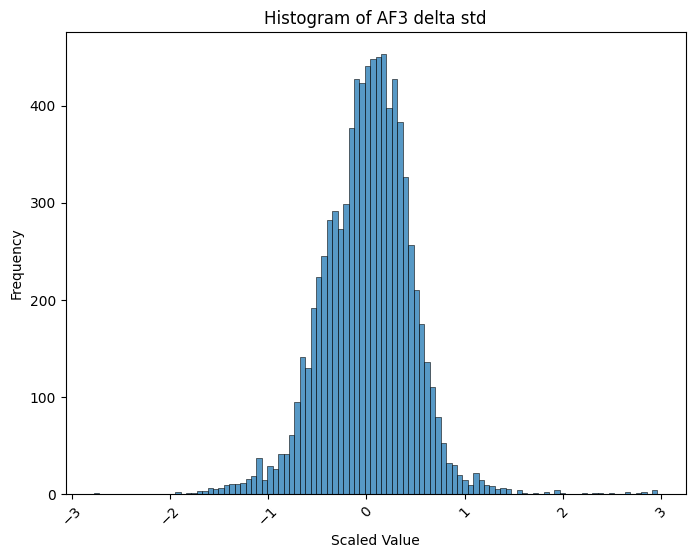

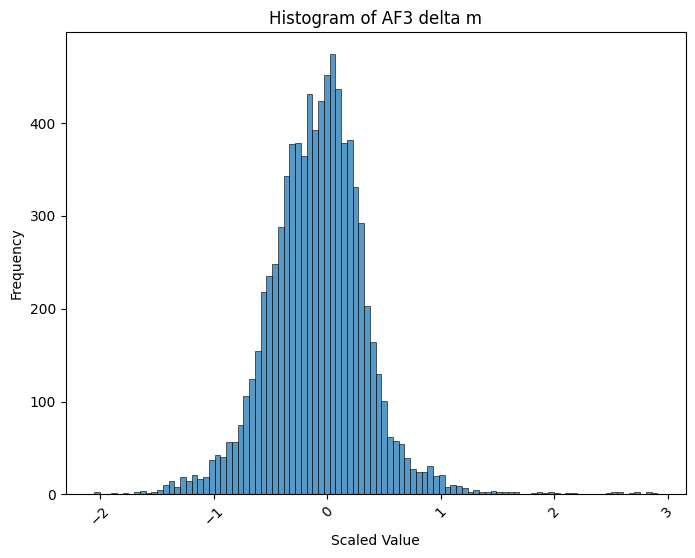

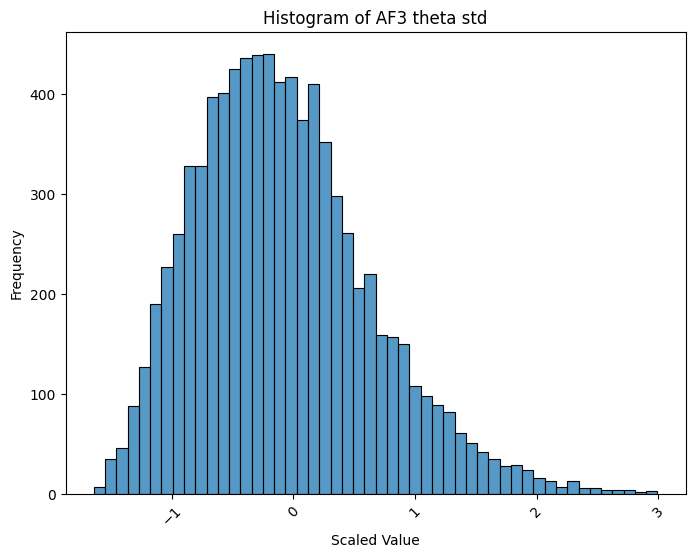

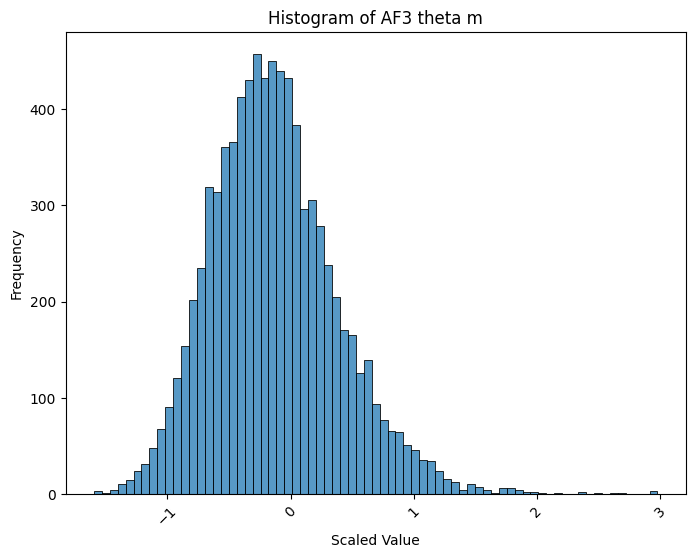

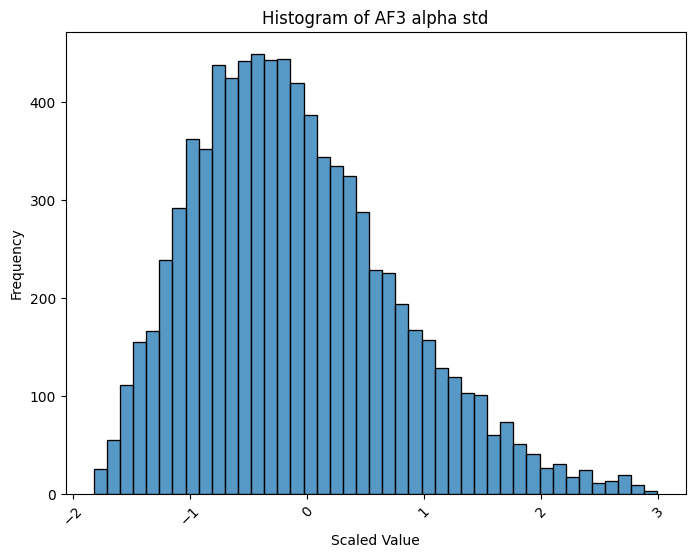

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the scaled dataset
for column_name in df.columns[:5]:
    column_data = df[column_name]

    # Create a histogram
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(column_data, kde=False)
    ax.set(title=f"Histogram of {column_name}", xlabel="Scaled Value", ylabel="Frequency")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

## NOTE
After apply StandarScaler() and removing outliers, the distribution of our dataset features looks pretty normal disribution with mean of 0 and standard distribution of 1.

## Checking the correlation of input variables with output variable

In [32]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending = False)

Class            1.000000
AF3 alpha m      0.049388
F4 theta std     0.034133
AF3 alpha std    0.027227
AF3 theta m      0.027119
                   ...   
F7 beta std     -0.050951
FC6 delta std   -0.056508
AF3 delta std   -0.058870
O1 beta std     -0.066454
AF4 delta std   -0.071384
Name: Class, Length: 114, dtype: float64

In [33]:
df = df.reset_index(drop=True)

In [34]:
df

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
0,0.079746,0.049762,-0.308773,-0.333524,-0.557591,0.383729,-0.098155,0.316722,-0.839721,-0.469198,...,1.580647,1.960999,0.768326,1.207728,1.292005,2.536701,1.939348,1.860453,0.0,0.0
1,0.230346,-0.021455,-0.165183,-0.050681,-0.191473,-0.687363,-0.139131,-0.384578,0.088228,-0.052296,...,-0.212181,-0.430579,-0.433851,-0.547113,-0.423403,-0.512449,-0.498405,-0.545251,1.0,0.0
2,0.167182,0.147060,0.078359,0.082707,-0.731994,-0.413256,0.278941,1.153163,1.287356,1.249558,...,0.512950,0.514752,-0.135331,-0.255297,-0.263423,-0.315530,-0.527788,-0.541495,2.0,0.0
3,0.125078,-0.160105,-0.114988,-0.384116,-0.730696,-0.685450,0.050497,-0.432647,-0.379277,-0.717760,...,-0.255606,-0.514959,-0.327757,-0.467773,-0.532417,-0.530954,-0.522693,-0.556364,1.0,1.0
4,-0.223403,-0.393961,-1.228466,-0.492373,-0.476580,1.724581,-0.903891,-0.827811,-1.304310,-1.322065,...,-0.355929,-0.541687,-0.419127,-0.441239,-0.355356,-0.447826,-0.510764,-0.556594,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,-0.309791,0.013614,0.120233,-0.122598,0.384877,0.979023,1.257951,2.441727,1.429794,1.784224,...,-0.385457,0.022359,-0.228371,-0.338839,-0.413936,-0.526488,-0.450116,-0.467692,2.0,1.0
8311,-0.598585,-0.462816,0.729862,0.444553,0.925786,0.679962,2.312220,0.948932,1.717257,1.265900,...,-0.969596,-0.801290,-0.203945,-0.320056,-0.432389,-0.501290,-0.472591,-0.480856,2.0,1.0
8312,0.311926,-0.063437,-0.537797,-0.746979,-0.347253,-0.196077,0.011591,-1.104502,-0.476939,-0.495339,...,-0.205554,-0.494816,-0.345475,-0.406241,-0.413061,-0.510850,-0.511913,-0.557843,1.0,0.0
8313,0.330672,0.233708,-0.707081,0.300745,-0.632777,-1.189074,1.295566,0.019161,-0.449343,-0.627480,...,0.943255,0.536914,-0.288009,-0.271943,0.188530,-0.232263,1.364468,0.433115,0.0,0.0


## Train-Test Split

We'll split our dataset by stratified train test split technique as follows:

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sp.split(df, df[['User','Class']]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

In [36]:
df_train

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
4473,0.194067,-0.198094,0.264506,-0.050772,0.032507,-0.330338,-1.213034,-1.306876,-0.998536,-1.213954,...,-0.293827,-0.527751,-0.506993,-0.496718,-0.419885,-0.490018,-0.508596,-0.530085,3.0,0.0
3016,0.232079,-0.051969,-0.296489,-0.414891,1.562749,-0.279557,0.250496,-0.008868,-0.526025,-0.575163,...,-0.249323,-0.500308,-0.327393,-0.446348,-0.374124,-0.476749,-0.492820,-0.543901,1.0,1.0
977,0.198654,-0.020721,-0.267041,-0.600734,0.490242,-0.457660,-0.202474,-0.768450,-0.557092,-0.720285,...,-0.177400,-0.479451,-0.241291,-0.517339,-0.448447,-0.505785,-0.512647,-0.540762,1.0,1.0
6807,-0.161830,-0.259243,-0.500821,-0.274073,0.529226,0.148456,-0.787562,-0.535653,-1.692966,-1.684111,...,-0.274115,-0.508596,-0.594707,-0.562014,-0.579194,-0.525884,-0.535019,-0.537264,3.0,2.0
4912,0.013695,-0.245975,0.618830,0.156605,-0.006667,0.359137,-1.225406,-1.072142,-1.003156,-1.076748,...,-0.278646,-0.529805,-0.588993,-0.475231,-0.141695,-0.469727,-0.526702,-0.554462,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6327,0.883281,0.708825,-0.003521,0.252869,1.373635,0.931107,2.134762,1.013144,1.929111,1.532949,...,0.119129,-0.240083,-0.376855,-0.514184,-0.420171,-0.450163,-0.518426,-0.511624,2.0,0.0
4382,0.072357,0.153425,0.355710,-0.360962,0.612644,0.726981,1.025486,1.021691,1.587648,1.822468,...,-0.338668,-0.244366,-0.430290,-0.372735,-0.533098,-0.394796,-0.500217,-0.492839,2.0,1.0
360,0.220684,0.048231,-0.610886,-0.377630,-0.470913,-1.288938,0.119035,0.570196,-0.141960,-0.061584,...,0.334671,0.055303,-0.207474,0.575282,0.568622,0.832596,0.993429,0.783550,0.0,2.0
8172,-0.284192,-0.307194,1.209808,0.482409,0.113201,-0.582596,-0.990310,-0.739933,-0.901369,-0.344274,...,-0.327000,-0.542134,-0.471700,-0.559445,-0.266461,-0.282718,-0.537983,-0.534125,3.0,1.0


In [37]:
df_test

,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,...,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m,User,Class
5711,0.548752,0.520418,0.382431,-0.470461,0.335459,0.278717,1.067104,1.179733,2.381855,1.876154,...,0.076948,-0.092307,-0.466829,-0.388905,-0.433783,-0.473709,-0.479897,-0.474142,2.0,2.0
1081,-0.249682,-0.324791,0.241059,0.366437,0.302577,-0.897696,-0.952422,-0.806835,-1.069896,-1.224165,...,-0.333810,-0.518599,-0.507015,-0.500736,-0.602544,-0.467255,-0.508619,-0.525921,3.0,2.0
6234,-0.752177,-0.948255,-0.579202,-0.760325,-0.893275,-0.385636,-0.693545,-0.721351,0.610349,0.286652,...,-0.344960,-0.596900,-0.428344,-0.529654,-0.547734,-0.553819,-0.506006,-0.526802,1.0,1.0
37,0.039606,0.155192,0.420993,0.027179,-0.966941,-0.898580,0.560383,1.852667,1.438207,1.550600,...,-0.449752,-0.152032,-0.388286,-0.478029,-0.213035,-0.344949,-0.498857,-0.499806,2.0,0.0
1995,-0.048613,-0.264333,-0.772600,-0.659042,-0.962494,-0.020380,-0.752211,-0.784578,-0.237931,-0.145361,...,-0.281491,-0.542419,-0.315163,-0.476244,-0.540990,-0.587953,-0.516106,-0.542414,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,-0.042925,-0.094974,0.764821,0.753829,-0.516542,-0.420753,-0.200704,1.430520,-0.205188,0.053388,...,1.423384,1.394985,1.408288,1.327779,0.169381,0.198411,1.147966,1.413782,0.0,2.0
7814,0.034067,-0.034258,-0.308166,-0.412185,-1.186528,0.061288,0.490316,-0.509525,0.008723,-0.026889,...,-0.294300,-0.531105,-0.618643,-0.519913,-0.543161,-0.456833,-0.528364,-0.528882,1.0,2.0
1137,0.036860,-0.022428,-1.247955,-0.263179,-0.938981,-0.555786,0.275414,-0.147016,0.162677,0.658287,...,-0.183337,-0.398588,-0.519300,-0.470322,-0.229382,-0.413931,-0.501117,-0.521978,1.0,0.0
6372,0.464253,0.219509,0.435908,0.610569,-0.831995,-0.061905,1.403537,1.300054,0.826191,0.920746,...,-0.313659,-0.534282,-0.480315,-0.505513,-0.513719,-0.515147,-0.538068,-0.542356,2.0,1.0


## Checking the proportion of proprotion of categories of `User` and `Class` in original dataset, train set, and test set.

In [38]:
df['User'].value_counts(normalize=True) * 100,df_train['User'].value_counts(normalize=True) * 100,df_test['User'].value_counts(normalize=True) * 100

(User
 1.0    32.603728
 3.0    30.583283
 0.0    20.228503
 2.0    16.584486
 Name: proportion, dtype: float64,
 User
 1.0    32.606735
 3.0    30.577270
 0.0    20.234516
 2.0    16.581479
 Name: proportion, dtype: float64,
 User
 1.0    32.591702
 3.0    30.607336
 0.0    20.204450
 2.0    16.596512
 Name: proportion, dtype: float64)

In [39]:
df['Class'].value_counts(normalize=True) * 100,df_train['Class'].value_counts(normalize=True) * 100,df_test['Class'].value_counts(normalize=True) * 100

(Class
 1.0    34.263379
 2.0    33.205051
 0.0    32.531569
 Name: proportion, dtype: float64,
 Class
 1.0    34.260373
 2.0    33.208058
 0.0    32.531569
 Name: proportion, dtype: float64,
 Class
 1.0    34.275406
 2.0    33.193025
 0.0    32.531569
 Name: proportion, dtype: float64)

## Splitting the Train and Test sets in Input and Output Data

In [40]:
X_train = df_train.drop('Class',axis=1)
y_train = df_train['Class']
X_test = df_test.drop('Class',axis=1)
y_test = df_test['Class']

## Model Selection and Training

We'll train Logistic Regression, Decison Tree Classifier, Random Forest Classifier, Support Vector Machine, Naive Bayes, K-Nearest Neighbour, and Artifificial Neural Networks (ANN).

## 1. Logistic Regression

In [41]:
# Assuming you have your features in X_train
# Create the Decision Tree Classifier
model1 = LogisticRegression()
model1.fit(X_train,y_train)

# Perform cross-validation and calculate the average accuracy
num_cross_val_folds = 10
cv_scores1 = cross_val_score(model1, X_train, y_train,scoring='accuracy' ,cv=num_cross_val_folds)

# Print the cross-validation scores for each fold
print("Cross-validation scores for each fold:", cv_scores1)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores1.mean())
test_predictions = model1.predict(X_test)

mse = mean_squared_error(test_predictions,y_test)
rmse1 = np.sqrt(mse)
accuracy1 = accuracy_score(y_test, test_predictions)

C:\Users\muzam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\muzam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-validation scores for each fold: [0.49099099 0.45045045 0.45714286 0.47969925 0.43759398 0.5112782
 0.42105263 0.47218045 0.47969925 0.46315789]
Average cross-validation score: 0.4663245952719636


C:\Users\muzam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Decision Tree Classifier

In [42]:
# Assuming you have your features in X_train
# Create the Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

# Perform cross-validation and calculate the average accuracy
num_cross_val_folds = 10
cv_scores2 = cross_val_score(model2, X_train, y_train,scoring='accuracy' ,cv=num_cross_val_folds)

# Print the cross-validation scores for each fold
print("Cross-validation scores for each fold:", cv_scores2)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores2.mean())
test_predictions = model2.predict(X_test)

mse = mean_squared_error(test_predictions,y_test)
rmse2 = np.sqrt(mse)
accuracy2 = accuracy_score(y_test, test_predictions)

Cross-validation scores for each fold: [0.65165165 0.60510511 0.62105263 0.61353383 0.56240602 0.62706767
 0.60451128 0.58045113 0.63157895 0.61052632]
Average cross-validation score: 0.6107884576305629


## 3. Random Forest Classifier

In [43]:
# Assuming you have your features in X_train
# Create the Decision Tree Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
# Perform cross-validation and calculate the average accuracy
num_cross_val_folds = 10
cv_scores3 = cross_val_score(model3, X_train, y_train,scoring='accuracy',cv=num_cross_val_folds)

# Print the cross-validation scores for each fold
print("Cross-validation scores for each fold:", cv_scores3)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores3.mean())
test_predictions = model3.predict(X_test)

mse = mean_squared_error(test_predictions,y_test)
rmse3 = np.sqrt(mse)
accuracy3 = accuracy_score(y_test, test_predictions)

Cross-validation scores for each fold: [0.83033033 0.82432432 0.81804511 0.80150376 0.81052632 0.82105263
 0.8075188  0.81804511 0.83458647 0.83157895]
Average cross-validation score: 0.8197511797511797


## 4. Support Vector Machine (SVM)

In [44]:
# Assuming you have your features in X_train
# Create the Decision Tree Classifier
model4 = SVC()
model4.fit(X_train,y_train)

# Perform cross-validation and calculate the average accuracy
num_cross_val_folds = 10
cv_scores4 = cross_val_score(model4, X_train, y_train,scoring='accuracy' ,cv=num_cross_val_folds)

# Print the cross-validation scores for each fold
print("Cross-validation scores for each fold:", cv_scores4)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores4.mean())
test_predictions = model4.predict(X_test)

mse = mean_squared_error(test_predictions,y_test)
rmse4 = np.sqrt(mse)
accuracy4 = accuracy_score(y_test, test_predictions)

Cross-validation scores for each fold: [0.5960961  0.53903904 0.60300752 0.60150376 0.57744361 0.60451128
 0.52481203 0.58646617 0.58045113 0.58646617]
Average cross-validation score: 0.5799796789270473


## 5. K-Nearest Neighbour

In [45]:
# Assuming you have your features in X_train
# Create the Decision Tree Classifier
model5 = KNeighborsClassifier()
model5.fit(X_train,y_train)

# Perform cross-validation and calculate the average accuracy
num_cross_val_folds = 10
cv_scores5 = cross_val_score(model5, X_train, y_train,scoring='accuracy' ,cv=num_cross_val_folds)
# Print the cross-validation scores for each fold
print("Cross-validation scores for each fold:", cv_scores5)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores5.mean())
test_predictions = model5.predict(X_test)

mse = mean_squared_error(test_predictions,y_test)
rmse5 = np.sqrt(mse)
accuracy5 = accuracy_score(y_test, test_predictions)

Cross-validation scores for each fold: [0.63813814 0.66216216 0.65864662 0.6481203  0.63759398 0.66466165
 0.65413534 0.65714286 0.63759398 0.64661654]
Average cross-validation score: 0.6504811578495788


## 6. Artificial Neural Network (ANN)

In [46]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
num_classes = 3  # Number of classes in your classification
y_train_encoded = to_categorical(y_train, num_classes=num_classes)

# Now, your y_train_encoded should have a shape of (number_of_samples, num_classes)

model6 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model6.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use appropriate loss for your task
              metrics=['accuracy'])

history = model6.fit(X_train, y_train_encoded, epochs=100, batch_size=32, verbose=1, validation_split=0.2)
train_accuracy = history.history['accuracy']

class_probabilities = model6.predict(X_test)

# Convert class probabilities to predicted classes
predicted_classes = class_probabilities.argmax(axis=-1)

mse = mean_squared_error(predicted_classes,y_test)
rmse6 = np.sqrt(mse)
accuracy6 = accuracy_score(y_test, predicted_classes)

Epoch 1/100
167/167 [==============================] - 3s 6ms/step - loss: 1.0868 - accuracy: 0.3932 - val_loss: 1.0790 - val_accuracy: 0.4110
Epoch 2/100
167/167 [==============================] - 1s 4ms/step - loss: 1.0523 - accuracy: 0.4473 - val_loss: 1.0636 - val_accuracy: 0.4132
Epoch 3/100
167/167 [==============================] - 1s 4ms/step - loss: 1.0131 - accuracy: 0.4975 - val_loss: 1.0570 - val_accuracy: 0.4328
Epoch 4/100
167/167 [==============================] - 1s 4ms/step - loss: 0.9793 - accuracy: 0.5232 - val_loss: 1.0202 - val_accuracy: 0.4838
Epoch 5/100
167/167 [==============================] - 1s 4ms/step - loss: 0.9364 - accuracy: 0.5478 - val_loss: 1.0766 - val_accuracy: 0.4440
Epoch 6/100
167/167 [==============================] - 1s 4ms/step - loss: 0.9062 - accuracy: 0.5698 - val_loss: 0.9684 - val_accuracy: 0.5267
Epoch 7/100
167/167 [==============================] - 1s 4ms/step - loss: 0.8545 - accuracy: 0.6046 - val_loss: 0.9825 - val_accuracy: 0.5274

Epoch 58/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1737 - accuracy: 0.9344 - val_loss: 1.7453 - val_accuracy: 0.6356
Epoch 59/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9359 - val_loss: 1.6603 - val_accuracy: 0.6326
Epoch 60/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1593 - accuracy: 0.9410 - val_loss: 1.7706 - val_accuracy: 0.6439
Epoch 61/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1811 - accuracy: 0.9288 - val_loss: 1.7829 - val_accuracy: 0.6401
Epoch 62/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1866 - accuracy: 0.9307 - val_loss: 1.8447 - val_accuracy: 0.6394
Epoch 63/100
167/167 [==============================] - 1s 4ms/step - loss: 0.1991 - accuracy: 0.9246 - val_loss: 1.8410 - val_accuracy: 0.6319
Epoch 64/100
167/167 [==============================] - 1s 4ms/step - loss: 0.2212 - accuracy: 0.9233 - val_loss: 1.7632 - val_accuracy:

In [47]:
([rmse1,accuracy1],[rmse2,accuracy2],[rmse3,accuracy3],[rmse4,accuracy4],[rmse5,accuracy5],[rmse6,accuracy6])

([1.0464267866619508, 0.44798556825015035],
 [0.8690578665808308, 0.6001202645820806],
 [0.5422609179970574, 0.841250751653638],
 [0.8996558438660225, 0.582080577269994],
 [0.8002555214299205, 0.6590499098015634],
 [0.8180907035765732, 0.6428141912206855])

## Final Model Selection

It's clear that out of all classifiers, random forest classifier has highest accuracy. We'll finally consider this model for our further predictions.

In [48]:
model3

RandomForestClassifier()

In [49]:
print("Test Accuracy of Random Forest Classifier is {:.2f}%.".format(accuracy3 * 100))

Test Accuracy of Random Forest Classifier is 84.13%.


In [50]:
dump(model3,'RFC_Model.joblib')

['RFC_Model.joblib']